In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
survey_df = pd.read_csv('survey_prelucrat_final.csv')

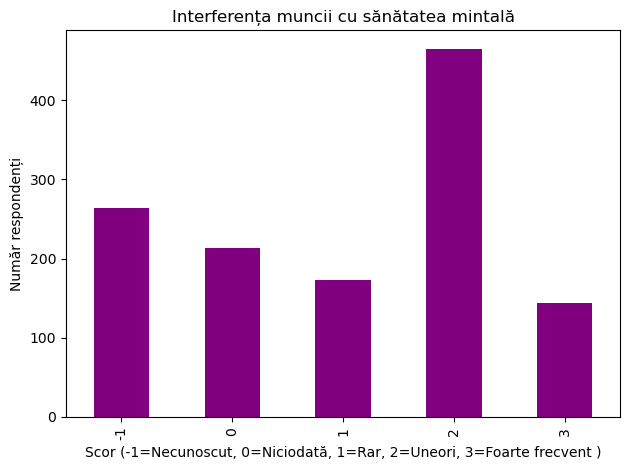

In [7]:
survey_df['work_interfere_score'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Interferența muncii cu sănătatea mintală')
plt.xlabel('Scor (-1=Necunoscut, 0=Niciodată, 1=Rar, 2=Uneori, 3=Foarte frecvent )')
plt.ylabel('Număr respondenți')
plt.tight_layout()
plt.show()


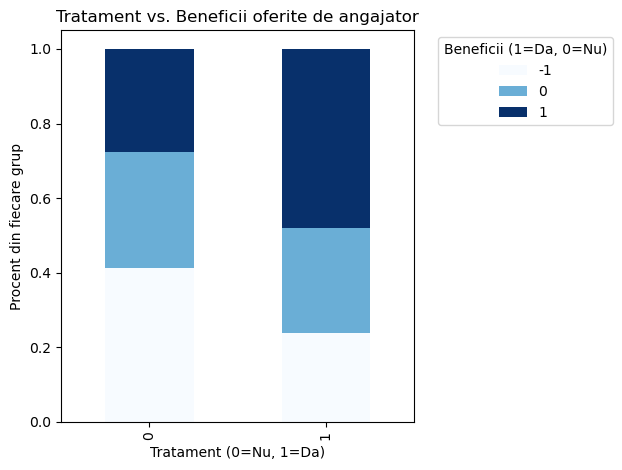

In [15]:

crosstab_tb = pd.crosstab(survey_df['treatment'], survey_df['benefits'], normalize='index')
ax = crosstab_tb.plot(kind='bar', stacked=True, colormap='Blues')
plt.title('Tratament vs. Beneficii oferite de angajator')
plt.xlabel('Tratament (0=Nu, 1=Da)')
plt.ylabel('Procent din fiecare grup') 
plt.legend(title='Beneficii (1=Da, 0=Nu)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



C:\Users\georg\AppData\Local\Temp\ipykernel_5360\3294442648.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=survey_df, x='gender_simplified', y='leave_score', palette='Set2')


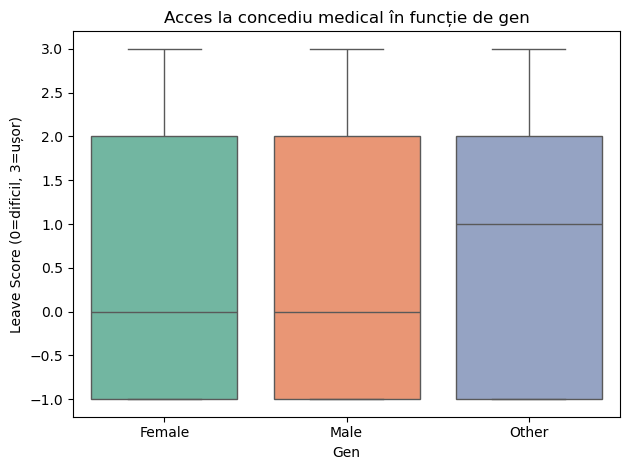

In [21]:

sns.boxplot(data=survey_df, x='gender_simplified', y='leave_score', palette='Set2')
plt.title('Acces la concediu medical în funcție de gen')
plt.ylabel('Leave Score (0=dificil, 3=ușor)')
plt.xlabel('Gen')
plt.tight_layout()
plt.show()


In [31]:
leave_map_inv_ro = {
    3: 'Foarte ușor',
    2: 'Ușor',
    1: 'Dificil',
    0: 'Foarte dificil',
    -1: "Nu știe"
}

survey_df['leave_text_ro'] = survey_df['leave_score'].map(leave_map_inv_ro)



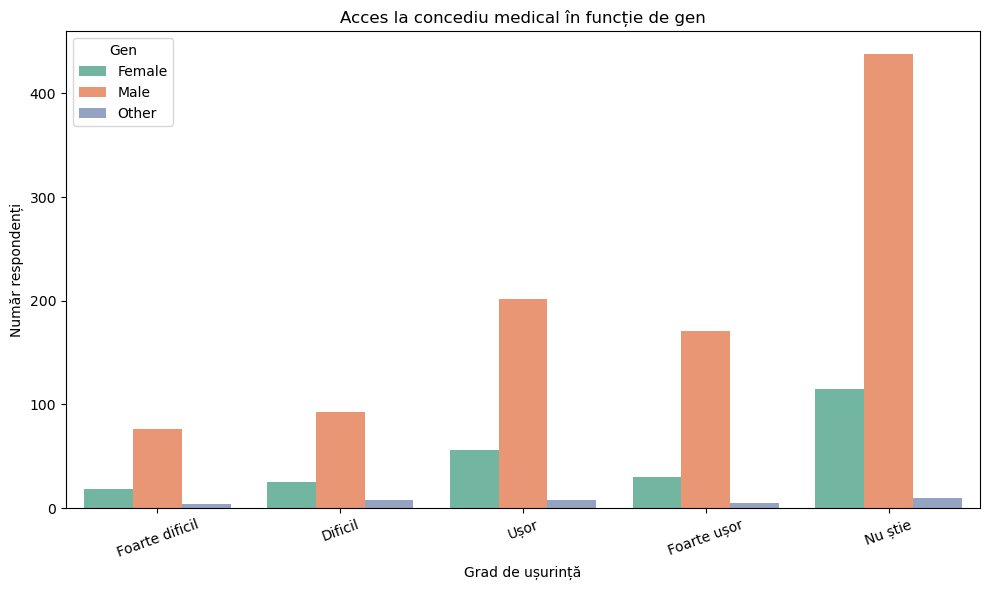

In [33]:

plt.figure(figsize=(10,6))
sns.countplot(
    data=survey_df,
    x='leave_text_ro',
    hue='gender_simplified',
    order=['Foarte dificil', 'Dificil', 'Ușor', 'Foarte ușor', 'Nu știe'],
    palette='Set2'
)

plt.title('Acces la concediu medical în funcție de gen')
plt.xlabel('Grad de ușurință')
plt.ylabel('Număr respondenți')
plt.xticks(rotation=20)
plt.legend(title='Gen')
plt.tight_layout()
plt.show()




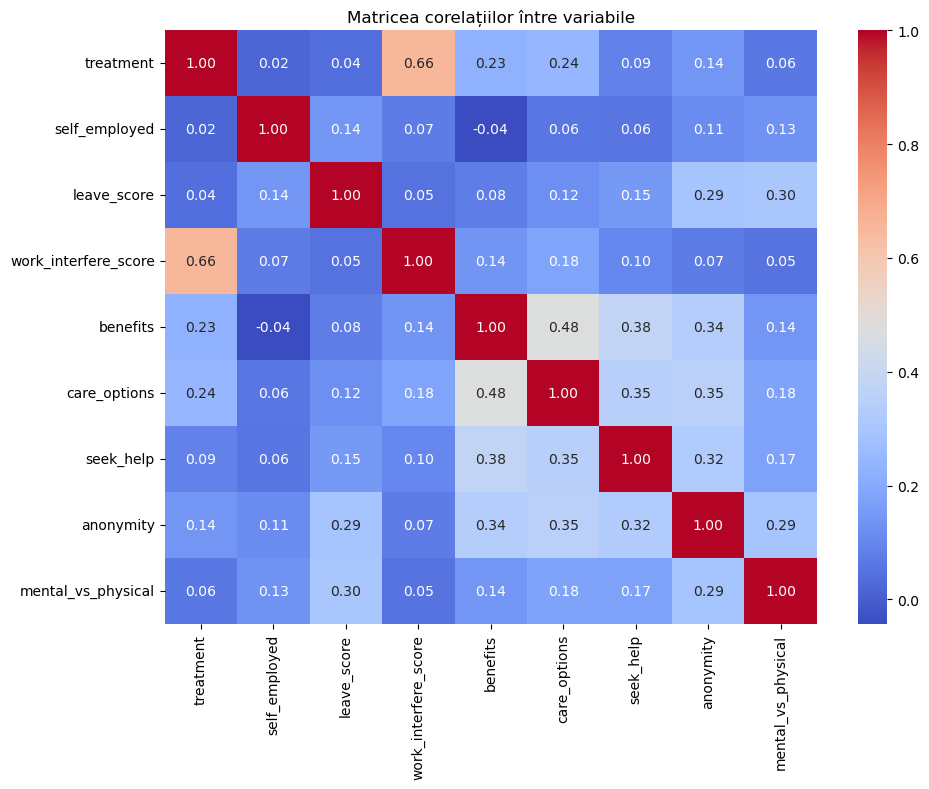

In [37]:

corr_cols = ['treatment', 'self_employed', 'leave_score', 'work_interfere_score',
             'benefits', 'care_options', 'seek_help', 'anonymity', 'mental_vs_physical']

corr_matrix = survey_df[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matricea corelațiilor între variabile')
plt.tight_layout()
plt.show()


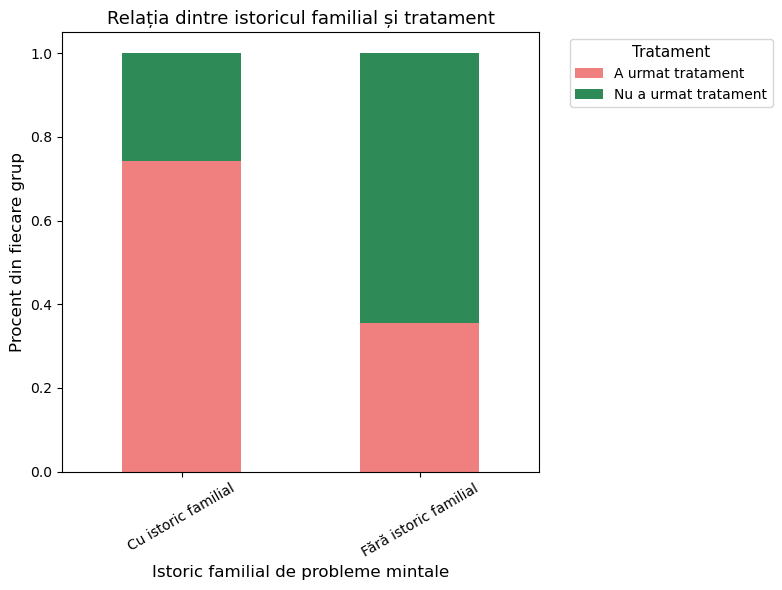

In [47]:

crosstab_fh = pd.crosstab(
    survey_df['family_history'].map({0: 'Fără istoric familial', 1: 'Cu istoric familial'}),
    survey_df['treatment'].map({0: 'Nu a urmat tratament', 1: 'A urmat tratament'}),
    normalize='index'
)

ax = crosstab_fh.plot(kind='bar', stacked=True, color=['lightcoral', 'seagreen'], figsize=(8, 6))

plt.title('Relația dintre istoricul familial și tratament', fontsize=13)
plt.xlabel('Istoric familial de probleme mintale', fontsize=12)
plt.ylabel('Procent din fiecare grup', fontsize=12)

plt.legend(title='Tratament', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)

plt.xticks(rotation=30)

plt.tight_layout()
plt.show()
